# Import Excel data file

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt

In [2]:
# Declaring Constants
alpha = 0.33
delta = 0.07

In [3]:
file_path = "data/Question-3.xlsx"
file_path_savings_rate = "data/Sav_Rate_CN_IND.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')
df_savings_rate =  pd.read_excel(file_path_savings_rate, engine='openpyxl')

In [4]:
df_savings_rate.head()

,Savings_Rate_Year,China,India
0,1960,37.106808,6.042585
1,1961,19.427130,6.860309
2,1962,15.146288,7.699568
3,1963,18.837091,9.590285
4,1964,26.794387,9.494435


In [5]:
df['year'] = pd.to_datetime(df['observation_date']).dt.year

In [6]:
# Filtered Columns from the year 2001 to 2019
df_filtered = df[(df['year'] >= 2001) & (df['year'] <= 2019)]
df_savings_rate_filtered = df_savings_rate[(df_savings_rate['Savings_Rate_Year'] >= 2001) & (df_savings_rate['Savings_Rate_Year'] <= 2019)]

In [7]:
# Compute TFP aka A_t for China and India and annex it in the dataset

# Formula
# A_t = Y_t / ((K_t ^ alpha) * (L_t ^ (1-alpha)))

df_filtered.loc[:,'At_China'] = df_filtered['RGDPNACNA666NRUG (Y_t)'] / ((df_filtered['RKNANPCNA666NRUG (K_t)'] ** alpha) * (df_filtered['POPTOTCNA647NWDB (L_t)'] ** (1-alpha)))
df_filtered.loc[:,'At_India'] = df_filtered['RGDPNAINA666NRUG_IN (Y_t)'] / ((df_filtered['RKNANPINA666NRUG_IN (K_t)'] ** alpha) * (df_filtered['POPTOTINA647NWDB_IN (L_t)'] ** (1-alpha)))

/tmp/ipykernel_12787/2588540964.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:,'At_China'] = df_filtered['RGDPNACNA666NRUG (Y_t)'] / ((df_filtered['RKNANPCNA666NRUG (K_t)'] ** alpha) * (df_filtered['POPTOTCNA647NWDB (L_t)'] ** (1-alpha)))
/tmp/ipykernel_12787/2588540964.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:,'At_India'] = df_filtered['RGDPNAINA666NRUG_IN (Y_t)'] / ((df_filtered['RKNANPINA666NRUG_IN (K_t)'] ** alpha) * (df_filtered['POPTOTINA647NWDB_IN (L

In [28]:
# del df_filtered['At_China']
df_filtered.head()

,observation_date,RGDPNACNA666NRUG (Y_t),RKNANPCNA666NRUG (K_t),POPTOTCNA647NWDB (L_t),RGDPNAINA666NRUG_IN (Y_t),RKNANPINA666NRUG_IN (K_t),POPTOTINA647NWDB_IN (L_t),year,At_China,At_India,gL_China,gL_India
41,2001-01-01,6370915.0,13473339.0,1271850000,2851826.75,9323320.0,1077898575,2001,0.022465,0.012686,NaN,NaN
42,2002-01-01,6969823.0,14960161.0,1280400000,2960309.50,9916184.0,1097600380,2002,0.023636,0.012748,0.006722,0.018278
43,2003-01-01,7496914.0,16804928.0,1288400000,3193001.25,10550977.0,1116803006,2003,0.024364,0.013316,0.006248,0.017495
44,2004-01-01,8225812.5,18906530.0,1296075000,3445980.75,11291206.0,1135991513,2004,0.025611,0.013893,0.005957,0.017182
45,2005-01-01,9019761.0,21265522.0,1303720000,3719020.50,12177142.0,1154676322,2005,0.026908,0.014466,0.005899,0.016448


In [8]:
# Computing average values (gA_China and gA_India) from 2001-2019
gA_China = df_filtered['At_China'].mean()
gA_India = df_filtered['At_India'].mean()

# Population growth rate
df_filtered['gL_China'] = df_filtered['POPTOTCNA647NWDB (L_t)'].pct_change()
df_filtered['gL_India'] = df_filtered['POPTOTINA647NWDB_IN (L_t)'].pct_change()

# Avg Population growth rate 2001-2019
gL_India_avg = df_filtered['gL_India'].mean()
gL_China_avg = df_filtered['gL_China'].mean()

# print(gA_China, gA_India,gL_India_avg, gL_China_avg)

# Savings Rate average for the period 2001-2019
sAvg_china = df_savings_rate_filtered['China'].mean()
sAvg_India = df_savings_rate_filtered['India'].mean()

print(sAvg_china,sAvg_India)


46.13616411984454 30.91901352827366


/tmp/ipykernel_12787/1436527206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gL_China'] = df_filtered['POPTOTCNA647NWDB (L_t)'].pct_change()
/tmp/ipykernel_12787/1436527206.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gL_India'] = df_filtered['POPTOTINA647NWDB_IN (L_t)'].pct_change()


# 3.B 
Assume that TFP continues to grow at rate gA and population at rate gL for the following
21 years (until 2040). Using the law of motion for capital in period t + 1,
Kt+1 = Kt + sYt − δKt ,
compute output in every period 2020-2040. Hint: You have all the variables in 2019 al-
ready; TFP and population in 2020 are obtained directly using their growth rates, while
capital in 2020 is given by the equation above. You are then able to compute output in
2020 using the production function. Repeat for all the other future years.

In [10]:
# Initialize dataFrame with 2019 values
years = list(range(2019,2041))
df_proj = pd.DataFrame({'Year': years})


# df_proj.loc[df_proj['Year'] == 2019, 'A'] = A_2019

At_CN_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'At_China'].values[0]
At_IND_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'At_India'].values[0]

Lt_CN_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'POPTOTCNA647NWDB (L_t)'].values[0]
Lt_IND_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'POPTOTINA647NWDB_IN (L_t)'].values[0]

Kt_CN_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'RKNANPCNA666NRUG (K_t)'].values[0]
Kt_IND_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'RKNANPINA666NRUG_IN (K_t)'].values[0]

Yt_CN_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'RGDPNACNA666NRUG (Y_t)'].values[0]
Yt_IND_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'RGDPNAINA666NRUG_IN (Y_t)'].values[0]


df_proj.loc[df_proj['Year'] == 2019, 'At_CN'] = At_CN_2019
df_proj.loc[df_proj['Year'] == 2019, 'At_IND'] = At_IND_2019

df_proj.loc[df_proj['Year'] == 2019, 'Lt_CN'] = Lt_CN_2019
df_proj.loc[df_proj['Year'] == 2019, 'Lt_IND'] = Lt_IND_2019

df_proj.loc[df_proj['Year'] == 2019, 'Kt_CN'] = Kt_CN_2019
df_proj.loc[df_proj['Year'] == 2019, 'Kt_IND'] = Kt_IND_2019

df_proj.loc[df_proj['Year'] == 2019, 'Yt_CN'] = Yt_CN_2019
df_proj.loc[df_proj['Year'] == 2019, 'Yt_IND'] = Yt_IND_2019

# df_proj.set_index('Year', inplace=True)


print(At_IND_2019,At_CN_2019)

# df_proj.head()

0.022396929334568424 0.03502193882200032


In [11]:
# Loop to calculate projections for the years 2020-2040

for t in range(2020,2041):
    prev_year = t - 1
    
    # Computing next year TFP (At_China and At_India)
    At_CN_Proj = df_proj.loc[df_proj['Year'] == prev_year, 'At_CN'].values[0] * (1+gA_China)
    At_IND_Proj = df_proj.loc[df_proj['Year'] == prev_year, 'At_IND'].values[0] * (1+gA_India)
    # Computing next year Population growth rate 
    Lt_CN_Proj = df_proj.loc[df_proj['Year'] == prev_year, 'Lt_CN'].values[0] * (1+gL_China_avg)
    Lt_IND_Proj = df_proj.loc[df_proj['Year'] == prev_year, 'Lt_IND'].values[0] * (1+gL_India_avg)
    # Computing next year Capital using accumulation equation
    Kt_CN_Proj = df_proj.loc[df_proj['Year'] == prev_year, 'Kt_CN'].values[0] + sAvg_china * df_proj.loc[df_proj['Year'] == prev_year, 'Yt_CN'].values[0] - delta * df_proj.loc[df_proj['Year'] == prev_year, 'Kt_CN'].values[0]
    Kt_IND_Proj = df_proj.loc[df_proj['Year'] == prev_year, 'Kt_IND'].values[0] + sAvg_India * df_proj.loc[df_proj['Year'] == prev_year, 'Yt_IND'].values[0] - delta * df_proj.loc[df_proj['Year'] == prev_year, 'Kt_IND'].values[0]
    # Compute GDP using the CObb-Douglas production function
    Yt_CN_Proj = At_CN_Proj * (Kt_CN_Proj ** alpha) * (Lt_CN_Proj ** (1-alpha))
    Yt_IND_Proj = At_IND_Proj * (Kt_IND_Proj ** alpha) * (Lt_IND_Proj ** (1-alpha))
    
    # Store it in the df_proj dataframes
    df_proj.loc[df_proj['Year'] == t, 'At_CN'] = At_CN_Proj
    df_proj.loc[df_proj['Year'] == t, 'At_IND'] = At_IND_Proj
    df_proj.loc[df_proj['Year'] == t, 'Lt_CN'] = Lt_CN_Proj
    df_proj.loc[df_proj['Year'] == t, 'Lt_IND'] = Lt_IND_Proj
    df_proj.loc[df_proj['Year'] == t, 'Kt_CN'] = Kt_CN_Proj
    df_proj.loc[df_proj['Year'] == t, 'Kt_IND'] = Kt_IND_Proj
    df_proj.loc[df_proj['Year'] == t, 'Yt_CN'] = Yt_CN_Proj
    df_proj.loc[df_proj['Year'] == t, 'Yt_IND'] = Yt_IND_Proj
    
    

In [12]:
df_proj.head(22)

# df_proj.to_excel("GDP_Projection_CHINA_INDIA.xlsx", index=False)

,Year,At_CN,At_IND,Lt_CN,Lt_IND,Kt_CN,Kt_IND,Yt_CN,Yt_IND
0,2019,0.035022,0.022397,1.407745e+09,1.389030e+09,9.960866e+07,3.420148e+07,2.057261e+07,9.163052e+06
1,2020,0.036115,0.022778,1.415707e+09,1.408741e+09,1.041777e+09,3.151199e+08,4.620722e+07,1.957606e+07
2,2021,0.037243,0.023165,1.423715e+09,1.428732e+09,3.100677e+09,8.983341e+08,6.855162e+07,2.839788e+07
3,2022,0.038406,0.023559,1.431767e+09,1.449007e+09,6.046338e+09,1.713485e+09,8.845503e+07,3.607903e+07
4,2023,0.039605,0.023960,1.439865e+09,1.469569e+09,9.704071e+09,2.709069e+09,1.070330e+08,4.308519e+07
5,2024,0.040841,0.024367,1.448009e+09,1.490423e+09,1.396288e+10,3.851586e+09,1.249274e+08,4.967999e+07
6,2025,0.042116,0.024781,1.456199e+09,1.511573e+09,1.874915e+10,5.118031e+09,1.425255e+08,5.602056e+07
7,2026,0.043431,0.025203,1.464436e+09,1.533023e+09,2.401229e+10,6.491870e+09,1.600828e+08,6.220833e+07
8,2027,0.044787,0.025631,1.472719e+09,1.554778e+09,2.971704e+10,7.960859e+09,1.777814e+08,6.831346e+07
9,2028,0.046186,0.026067,1.481049e+09,1.576841e+09,3.583900e+10,9.515784e+09,1.957605e+08,7.438738e+07


# Part - 3.C 
 Discuss the difference between china and india in the years 2001-2019 and how those differences shape your predicitions for 2020-2040

In [20]:
# plt.figure(figsize=(10,5))
# 
# # from 2001-2019
# plt.plot(df_filtered['year'], df_filtered['RGDPNACNA666NRUG (Y_t)'],marker='o', label='GDP_CN')
# plt.plot(df_filtered['year'], df_filtered['RGDPNAINA666NRUG_IN (Y_t)'],marker='o', label='GDP_IN')
# 
# # Projected
# # plt.plot(df_proj['Year'], df_proj['Yt_CN'] , marker='o', label="Projected GDP CN")
# # plt.plot(df_proj['Year'], df_proj['Yt_IND'] , marker='o', label="Projected GDP IND")
# 
# # in logarithmic scale
# plt.yscale('log')
# plt.ylim(df_filtered['RGDPNACNA666NRUG (Y_t)'].min() * 0.9 ,df_proj['Yt_CN'].max() * 0.0)
# plt.ylim(df_filtered['RGDPNAINA666NRUG_IN (Y_t)'].min() * 0.9 ,df_proj['Yt_IND'].max() * 0.0)
# 
# plt.xlabel("Year")
# plt.ylabel("GDP")
# plt.title("GDP Growth (2001-2019)")
# plt.legend()
# plt.grid()
# plt.show()

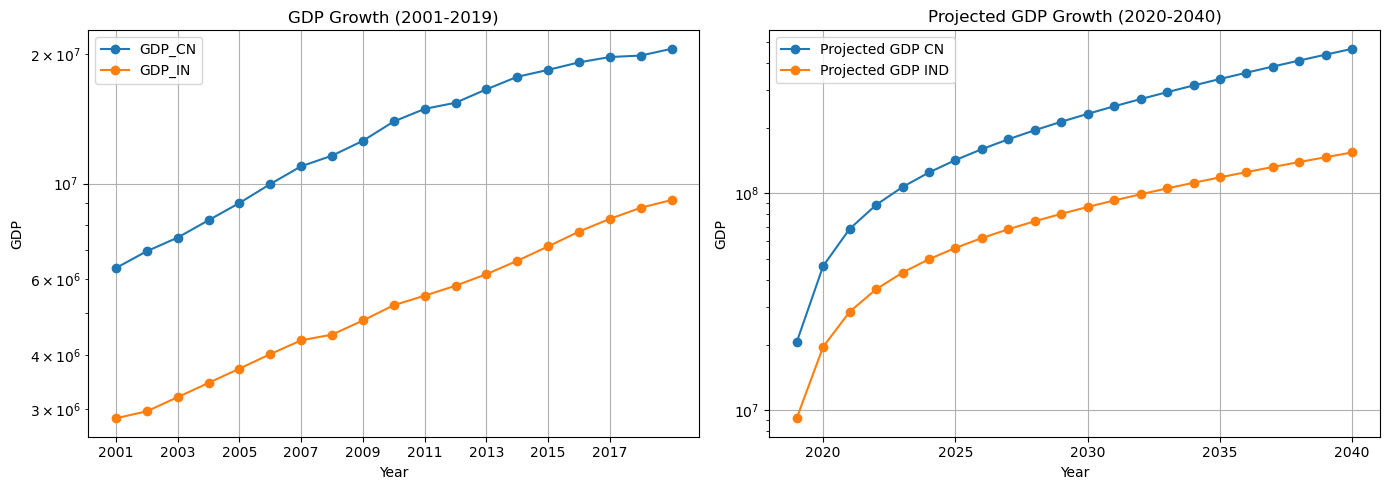

In [27]:
# import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

# --- Subplot 1: Historical GDP (2001-2019) ---
axes[0].plot(df_filtered['year'], df_filtered['RGDPNACNA666NRUG (Y_t)'], marker='o', label="GDP_CN")
axes[0].plot(df_filtered['year'], df_filtered['RGDPNAINA666NRUG_IN (Y_t)'], marker='o', label="GDP_IN")

axes[0].set_yscale("log")  # Logarithmic scale
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP")
axes[0].set_title("GDP Growth (2001-2019)")
axes[0].legend()
axes[0].grid()

year_ticks = np.arange(2001, 2019, 2)

axes[0].set_xticks(year_ticks)

# --- Subplot 2: Projected GDP (2020-2040) ---
axes[1].plot(df_proj['Year'], df_proj['Yt_CN'], marker='o', label="Projected GDP CN")
axes[1].plot(df_proj['Year'], df_proj['Yt_IND'], marker='o', label="Projected GDP IND")

axes[1].set_yscale("log")  # Logarithmic scale
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP")
axes[1].set_title("Projected GDP Growth (2020-2040)")
axes[1].legend()
axes[1].grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# SCreenshot the graph and send it to RYAN

# 3.D) 
Now we perform the same exercise but with different parameters. Specifically, compute
the average growth rate of TFP in the years 2011-2019. Now call that gA . Do the same
for population growth to obtain a new gL . Do the same for saving rates to compute s.
Compute output for the years 2020-2040. Compare with the solution to b for both China
and India.

In [22]:
# df_filtered.head(22)

In [23]:
# Computing average values (gA_China and gA_India) from 2011-2019

start_year, end_year = 2011,2019

# Compute the average TFP growth rate (gA) for China
gA_China_short = df_filtered.loc[(df_filtered['year'] >= start_year) & (df_filtered['year'] <= end_year), 'At_China'].mean()
gA_India_short = df_filtered.loc[(df_filtered['year'] >= start_year) & (df_filtered['year'] <= end_year), 'At_India'].mean()

# Compute the average population growth rate (gL) for China
gL_China_short = df_filtered.loc[(df_filtered['year'] >= start_year) & (df_filtered['year'] <= end_year), 'gL_China'].mean()
gL_India_short = df_filtered.loc[(df_filtered['year'] >= start_year) & (df_filtered['year'] <= end_year), 'gL_India'].mean()


# Savings Rate average for the period 2001-2019
sAvg_china_short = df_savings_rate_filtered.loc[(df_savings_rate_filtered['Savings_Rate_Year'] >= start_year) & (df_savings_rate_filtered['Savings_Rate_Year'] <= end_year) , 'China'].mean()
sAvg_india_short = df_savings_rate_filtered.loc[(df_savings_rate_filtered['Savings_Rate_Year'] >= start_year) & (df_savings_rate_filtered['Savings_Rate_Year'] <= end_year) , 'India'].mean()


# print(sAvg_china, sAvg_India)
# print(sAvg_china_short,sAvg_india_short)

In [24]:
# Initialize dataFrame with 2019 values for short Projection 2011-2019
years = list(range(2019,2041))
df_proj_short = pd.DataFrame({'Year': years})

# df_proj.loc[df_proj['Year'] == 2019, 'A'] = A_2019

At_CN_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'At_China'].values[0]
At_IND_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'At_India'].values[0]

Lt_CN_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'POPTOTCNA647NWDB (L_t)'].values[0]
Lt_IND_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'POPTOTINA647NWDB_IN (L_t)'].values[0]

Kt_CN_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'RKNANPCNA666NRUG (K_t)'].values[0]
Kt_IND_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'RKNANPINA666NRUG_IN (K_t)'].values[0]

Yt_CN_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'RGDPNACNA666NRUG (Y_t)'].values[0]
Yt_IND_2019 = df_filtered.loc[df_filtered['year'] == 2019, 'RGDPNAINA666NRUG_IN (Y_t)'].values[0]

df_proj_short.loc[df_proj['Year'] == 2019, 'At_CN'] = At_CN_2019
df_proj_short.loc[df_proj['Year'] == 2019, 'At_IND'] = At_IND_2019

df_proj_short.loc[df_proj['Year'] == 2019, 'Lt_CN'] = Lt_CN_2019
df_proj_short.loc[df_proj['Year'] == 2019, 'Lt_IND'] = Lt_IND_2019

df_proj_short.loc[df_proj['Year'] == 2019, 'Kt_CN'] = Kt_CN_2019
df_proj_short.loc[df_proj['Year'] == 2019, 'Kt_IND'] = Kt_IND_2019

df_proj_short.loc[df_proj['Year'] == 2019, 'Yt_CN'] = Yt_CN_2019
df_proj_short.loc[df_proj['Year'] == 2019, 'Yt_IND'] = Yt_IND_2019

In [25]:
# Loop to calculate projections for the years 2020-2040 (with shorter projections 2011-2019)

for t in range(2020,2041):
    prev_year = t - 1
    
    # Computing next year TFP (At_China and At_India)
    At_CN_Proj = df_proj_short.loc[df_proj_short['Year'] == prev_year, 'At_CN'].values[0] * (1+gA_China_short)
    At_IND_Proj = df_proj_short.loc[df_proj_short['Year'] == prev_year, 'At_IND'].values[0] * (1+gA_India_short)
    # Computing next year Population growth rate 
    Lt_CN_Proj = df_proj_short.loc[df_proj_short['Year'] == prev_year, 'Lt_CN'].values[0] * (1+gL_China_short)
    Lt_IND_Proj = df_proj_short.loc[df_proj_short['Year'] == prev_year, 'Lt_IND'].values[0] * (1+gL_India_short)
    # Computing next year Capital using accumulation equation
    Kt_CN_Proj = df_proj_short.loc[df_proj_short['Year'] == prev_year, 'Kt_CN'].values[0] + sAvg_china_short * df_proj_short.loc[df_proj_short['Year'] == prev_year, 'Yt_CN'].values[0] - delta * df_proj_short.loc[df_proj_short['Year'] == prev_year, 'Kt_CN'].values[0]
    Kt_IND_Proj = df_proj_short.loc[df_proj_short['Year'] == prev_year, 'Kt_IND'].values[0] + sAvg_india_short * df_proj_short.loc[df_proj_short['Year'] == prev_year, 'Yt_IND'].values[0] - delta * df_proj_short.loc[df_proj_short['Year'] == prev_year, 'Kt_IND'].values[0]
    # Compute GDP using the CObb-Douglas production function
    Yt_CN_Proj = At_CN_Proj * (Kt_CN_Proj ** alpha) * (Lt_CN_Proj ** (1-alpha))
    Yt_IND_Proj = At_IND_Proj * (Kt_IND_Proj ** alpha) * (Lt_IND_Proj ** (1-alpha))
    
    # Store it in the df_proj dataframes
    df_proj_short.loc[df_proj_short['Year'] == t, 'At_CN'] = At_CN_Proj
    df_proj_short.loc[df_proj_short['Year'] == t, 'At_IND'] = At_IND_Proj
    df_proj_short.loc[df_proj_short['Year'] == t, 'Lt_CN'] = Lt_CN_Proj
    df_proj_short.loc[df_proj_short['Year'] == t, 'Lt_IND'] = Lt_IND_Proj
    df_proj_short.loc[df_proj_short['Year'] == t, 'Kt_CN'] = Kt_CN_Proj
    df_proj_short.loc[df_proj_short['Year'] == t, 'Kt_IND'] = Kt_IND_Proj
    df_proj_short.loc[df_proj_short['Year'] == t, 'Yt_CN'] = Yt_CN_Proj
    df_proj_short.loc[df_proj_short['Year'] == t, 'Yt_IND'] = Yt_IND_Proj

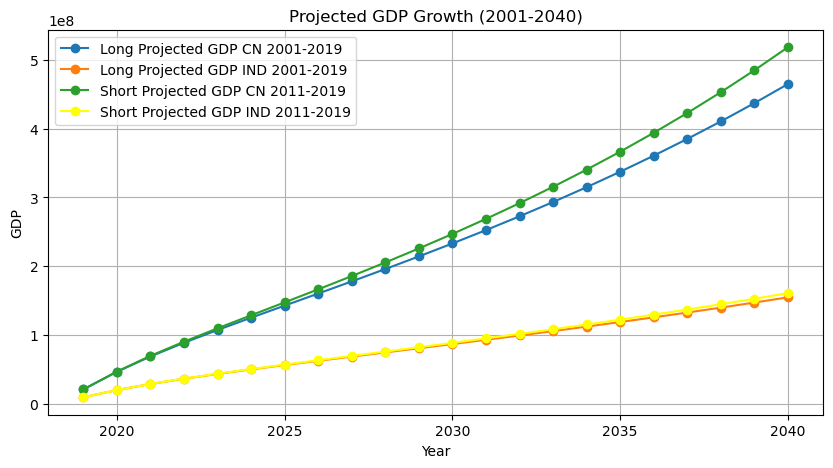

In [26]:
plt.figure(figsize=(10,5))

# from 2001-2019
# plt.plot(df_filtered['year'], df_filtered['RGDPNACNA666NRUG (Y_t)'],marker='o', label='GDP_CN')
# plt.plot(df_filtered['year'], df_filtered['RGDPNAINA666NRUG_IN (Y_t)'],marker='o', label='GDP_IN')

# Projected
plt.plot(df_proj['Year'], df_proj['Yt_CN'] , marker='o', label="Long Projected GDP CN 2001-2019")
plt.plot(df_proj['Year'], df_proj['Yt_IND'] , marker='o', label="Long Projected GDP IND 2001-2019")

plt.plot(df_proj_short['Year'], df_proj_short['Yt_CN'] , marker='o', label="Short Projected GDP CN 2011-2019")
plt.plot(df_proj_short['Year'], df_proj_short['Yt_IND'] , marker='o', label="Short Projected GDP IND 2011-2019", color='yellow')


# in logarithmic scale
# plt.yscale('log')
# plt.ylim(df_filtered['RGDPNACNA666NRUG (Y_t)'].min() * 0.9 ,df_proj['Yt_CN'].max() * 0.0)
# plt.ylim(df_filtered['RGDPNAINA666NRUG_IN (Y_t)'].min() * 0.9 ,df_proj['Yt_IND'].max() * 0.0)

plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Projected GDP Growth (2001-2040)")
plt.legend()
plt.grid()
plt.show()

# 3.E) 
What are the pros and cons of using a shorter vs a longer history to make predictions on
future growth?